## Steps that are involved in this notebook while Predicting real Estate Valuation in machine learning are as follows:

* Gathering data.
* Cleaning data.
* Feature engineering.
* Defining model.
* Training, testing the model, and predicting the output.

### Importing Essential libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import rcParams as rcP
import plotly.express as px 
%matplotlib inline

## Importing Dataset from Drive.

In [2]:
df = pd.read_csv("C:\\Users\\S M AMADUL ISLAM\\Desktop\\projectdataset\\project 1\\Pune house data.csv")
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,20-Dec,2 BHK,Somns T,981 - 1249,2.0,0.0,34.555,Law College Road
1,Super built-up Area,18-Jun,2 BHK,Gopia O,980 - 1030,2.0,0.0,35.175,Kasba Peth
2,Super built-up Area,Ready To Move,2 BHK,SKvanin,943 - 1220,2.0,0.0,38.665,Narayangaon
3,Super built-up Area,18-May,2 BHK,Brama P,942 - 1117,2.0,0.0,50.855,Chandan Nagar
4,Super built-up Area,18-Nov,2 BHK,Bhe 2ko,934 - 1437,2.0,0.0,58.680,Jangali Maharaj Road


# Exploratory Data Analysis

## Descriptive statistics of the data

In [3]:
# describe gives a summary of the statistics (only for numerical columns)
df.describe(include='all').style.background_gradient("Blues")

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
count,13277,13277,13261,7802,13277,13204.000000,12672.000000,13277.000000,13277
unique,4,81,31,2686,2072,nan,nan,nan,101
top,Super built-up Area,Ready To Move,2 BHK,GrrvaGr,1200,nan,nan,nan,Law College Road
freq,8779,10545,5193,80,843,nan,nan,nan,139
mean,nan,nan,nan,nan,nan,2.691306,1.585701,112.477955,nan
std,nan,nan,nan,nan,nan,1.338769,0.816670,149.062643,nan
min,nan,nan,nan,nan,nan,1.000000,0.000000,8.000000,nan
25%,nan,nan,nan,nan,nan,2.000000,1.000000,50.000000,nan
50%,nan,nan,nan,nan,nan,2.000000,2.000000,72.000000,nan
75%,nan,nan,nan,nan,nan,3.000000,2.000000,120.000000,nan


In [4]:
# The above command returns the number of unique values for each variable.
df.describe(include=[np.object])

C:\Users\S M AMADUL ISLAM\AppData\Local\Temp\ipykernel_23932\3570627552.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,area_type,availability,size,society,total_sqft,site_location
count,13277,13277,13261,7802,13277,13277
unique,4,81,31,2686,2072,101
top,Super built-up Area,Ready To Move,2 BHK,GrrvaGr,1200,Law College Road
freq,8779,10545,5193,80,843,139


* Used include=np.object for discrete variables.

In [5]:
df.dtypes

area_type         object
availability      object
size              object
society           object
total_sqft        object
bath             float64
balcony          float64
price            float64
site_location     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13277 entries, 0 to 13276
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13277 non-null  object 
 1   availability   13277 non-null  object 
 2   size           13261 non-null  object 
 3   society        7802 non-null   object 
 4   total_sqft     13277 non-null  object 
 5   bath           13204 non-null  float64
 6   balcony        12672 non-null  float64
 7   price          13277 non-null  float64
 8   site_location  13277 non-null  object 
dtypes: float64(3), object(6)
memory usage: 933.7+ KB


### Checking dimension of the Dataframe.

In [7]:
df.ndim

2

* The above dataframe is a 2-dimensional labeled data structure with columns of potentially different data types. 

In [8]:
df.shape

(13277, 9)

In [9]:
df.size

119493

#### The above command return size of the Dataframe which is equivalent to total number of elements. 
That is Rows X Columns. 

In [10]:
# Check the number of rows and columns of data
print(f'Number of Rows = {df.shape[0]} ,  Number of columns = {df.shape[1]}')

Number of Rows = 13277 ,  Number of columns = 9


In [11]:
df.count()

area_type        13277
availability     13277
size             13261
society           7802
total_sqft       13277
bath             13204
balcony          12672
price            13277
site_location    13277
dtype: int64

In [12]:
# Exploring the dataset
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2405
Carpet  Area              86
Plot  Area              2007
Super built-up  Area    8779
Name: area_type, dtype: int64

In [13]:
# Exploring the dataset
df.groupby('availability')['availability'].agg('count').sort_values(ascending=False)

availability
Ready To Move    10545
18-Dec             306
18-May             294
18-Apr             271
18-Aug             199
                 ...  
16-Oct               1
16-Nov               1
16-Jul               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64

In [14]:
# Exploring the dataset
df.groupby('size')['size'].agg('count').sort_values(ascending=False)

size
2 BHK         5193
3 BHK         4302
4 Bedroom      825
4 BHK          588
3 Bedroom      543
1 BHK          534
2 Bedroom      325
5 Bedroom      294
6 Bedroom      190
1 Bedroom      100
8 Bedroom       83
7 Bedroom       83
5 BHK           58
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
19 BHK           1
18 Bedroom       1
43 Bedroom       1
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
27 BHK           1
Name: size, dtype: int64

In [15]:
#Exploring the dataset
df.groupby('site_location')['site_location'].agg('count')

site_location
Alandi Road        138
Ambegaon Budruk    139
Anandnagar         139
Aundh              138
Aundh Road         139
                  ... 
Wanowrie           138
Warje              137
Yashwant Nagar       1
Yerawada           138
other                1
Name: site_location, Length: 101, dtype: int64

# Univariate Analysis
### * Numerical Variable
### * Categorical Variable

In [16]:
categorical=[]
numerical=[]
for i in range(df.columns.size):
    if df.iloc[:,i].dtype=="object":
        categorical.append(df.columns[i])
    else:
        numerical.append(df.columns[i])

## Numerical Variable

In [17]:
def plot_hist(variable):
    plt.figure(figsize=(15,5))
    plt.hist(df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Distribution with Histogram".format(variable))
    plt.show()

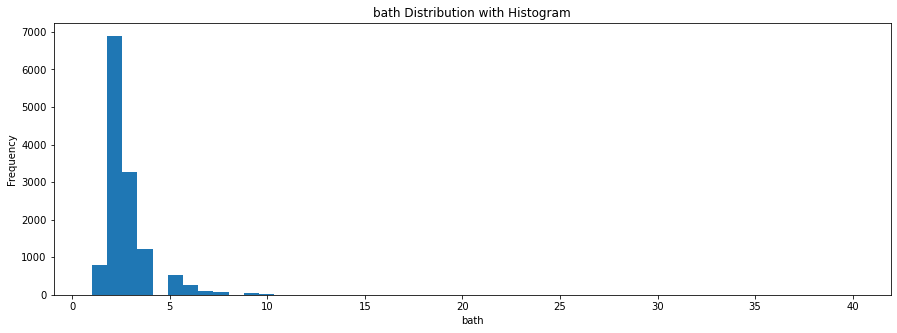

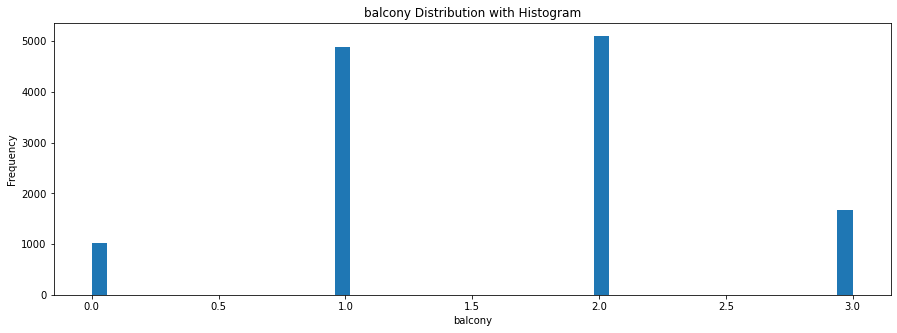

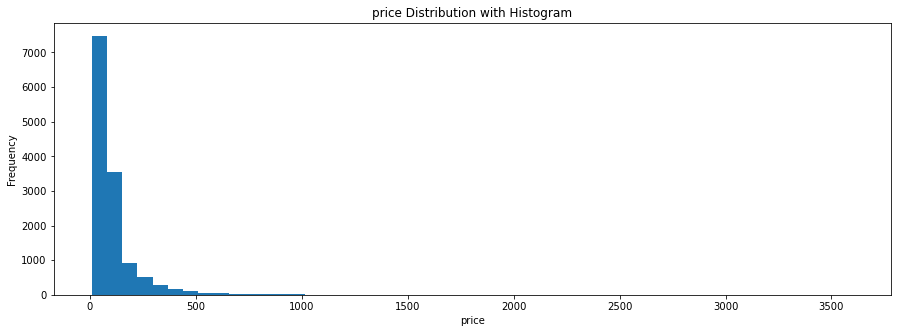

In [18]:
for i in numerical:
    plot_hist(i)

## Categorical Variable

In [19]:
def bar_plot(variable):
    var=df[variable]
    varValue=var.value_counts()
    plt.figure(figsize=(15,5))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}\n{}".format(variable, varValue))

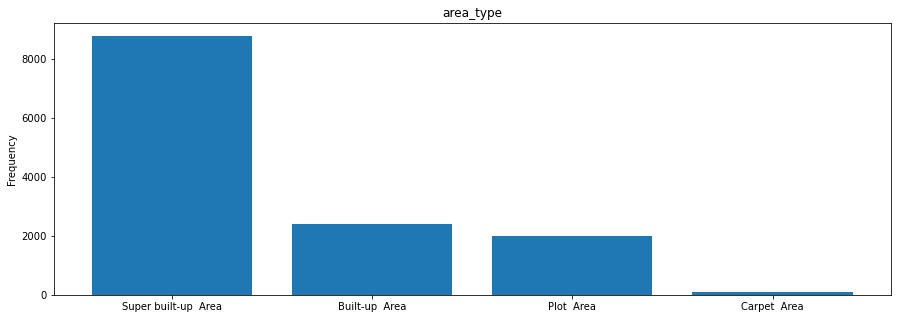

area_type
Super built-up  Area    8779
Built-up  Area          2405
Plot  Area              2007
Carpet  Area              86
Name: area_type, dtype: int64


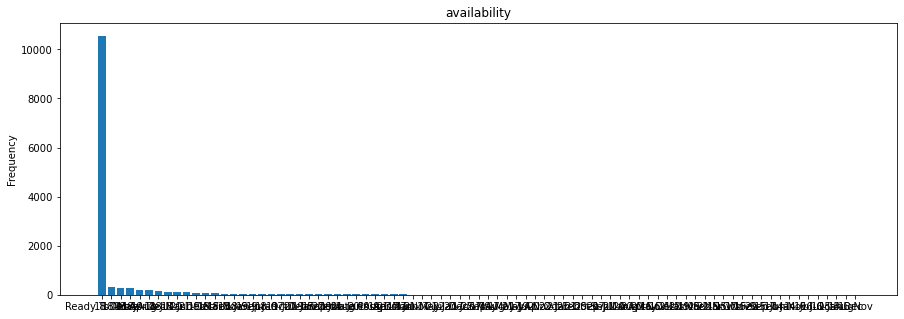

availability
Ready To Move    10545
18-Dec             306
18-May             294
18-Apr             271
18-Aug             199
                 ...  
16-Oct               1
16-Jan               1
15-Aug               1
15-Dec               1
16-Nov               1
Name: availability, Length: 81, dtype: int64


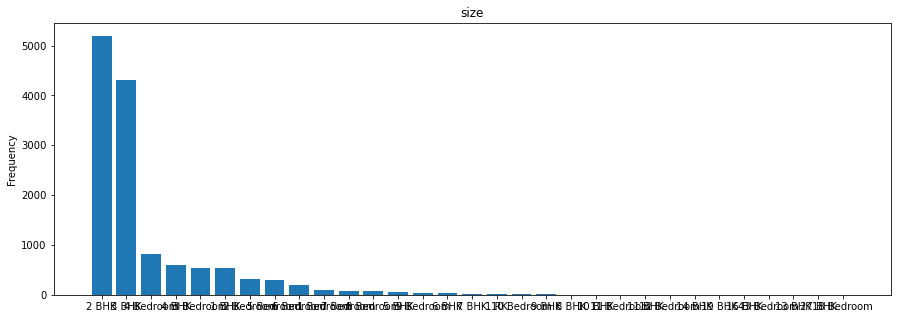

size
2 BHK         5193
3 BHK         4302
4 Bedroom      825
4 BHK          588
3 Bedroom      543
1 BHK          534
2 Bedroom      325
5 Bedroom      294
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           58
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
10 BHK           2
11 Bedroom       2
11 BHK           2
12 Bedroom       1
14 BHK           1
19 BHK           1
16 BHK           1
43 Bedroom       1
13 BHK           1
27 BHK           1
18 Bedroom       1
Name: size, dtype: int64


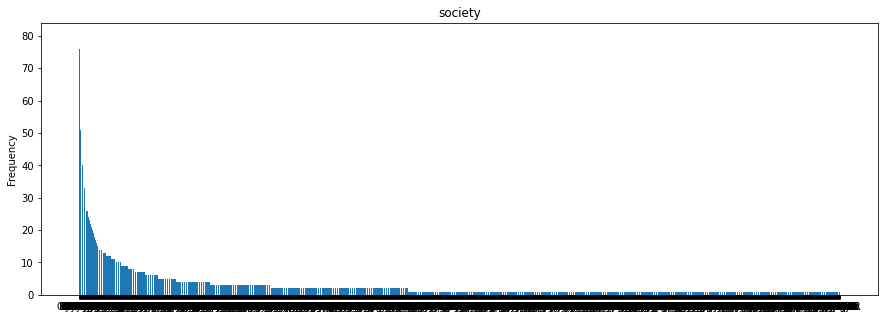

society
GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    58
GMown E    56
           ..
AReenui     1
Arndesa     1
Frhts H     1
SGncy R     1
SLiewce     1
Name: society, Length: 2686, dtype: int64


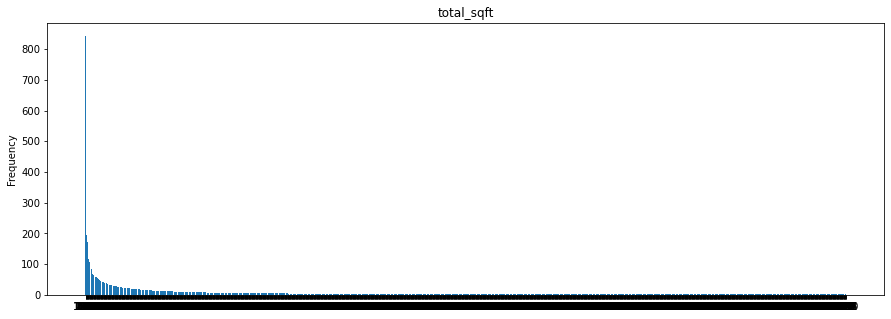

total_sqft
1200    843
1100    221
1500    205
2400    196
600     180
       ... 
2342      1
2363      1
2365      1
2370      1
1         1
Name: total_sqft, Length: 2072, dtype: int64


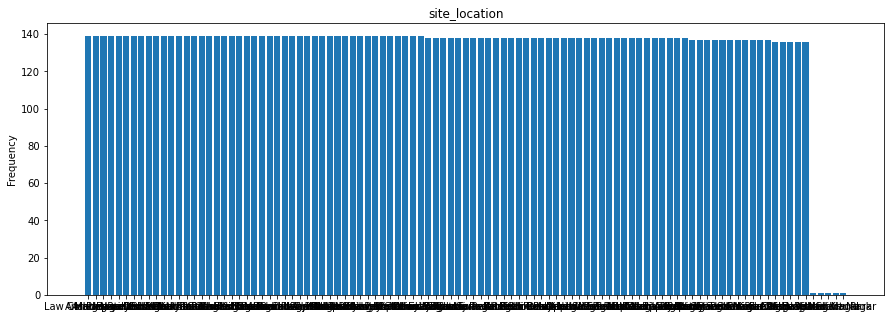

site_location
Law College Road    139
Anandnagar          139
Market yard         139
Baner               139
Ambegaon Budruk     139
                   ... 
other                 1
Bavdhan Khurd         1
Vitthal Nagar         1
Yashwant Nagar        1
Clover Park           1
Name: site_location, Length: 101, dtype: int64


In [20]:
for i in categorical:
    bar_plot(i)

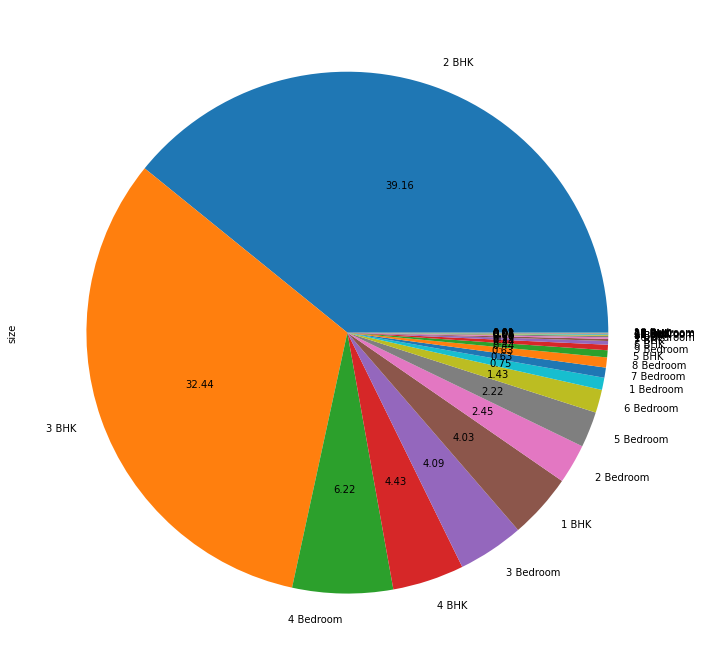

In [21]:
df['size'].value_counts().plot.pie(autopct='%.2f',figsize=(12, 12));

# Bivariate Analysis

<AxesSubplot:>

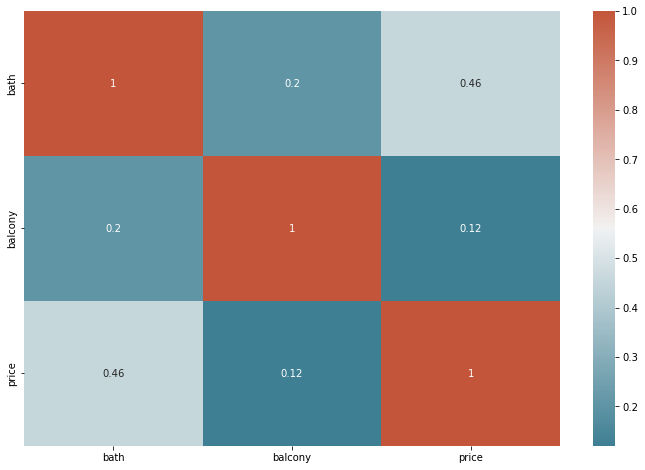

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
corr = df.corr(method='pearson')# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [23]:
pd.crosstab(df["site_location"], df["size"]).style.background_gradient(cmap='summer_r')

size,1 BHK,1 Bedroom,1 RK,10 BHK,10 Bedroom,11 BHK,11 Bedroom,12 Bedroom,13 BHK,14 BHK,16 BHK,18 Bedroom,19 BHK,2 BHK,2 Bedroom,27 BHK,3 BHK,3 Bedroom,4 BHK,4 Bedroom,43 Bedroom,5 BHK,5 Bedroom,6 BHK,6 Bedroom,7 BHK,7 Bedroom,8 BHK,8 Bedroom,9 BHK,9 Bedroom
site_location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alandi Road,3,1,0,0,0,0,0,0,0,0,0,0,0,61,4,0,43,4,9,8,0,0,2,1,0,0,1,0,0,0,1
Ambegaon Budruk,5,0,0,0,0,0,0,0,0,0,0,0,0,53,4,0,45,6,6,10,0,1,1,0,5,0,2,0,1,0,0
Anandnagar,7,1,0,0,0,0,0,0,0,0,0,0,0,49,4,0,50,3,8,10,0,0,3,0,1,1,1,0,0,0,1
Aundh,5,3,1,0,0,0,0,0,0,0,0,0,0,45,2,0,45,2,9,15,0,0,1,1,6,0,1,0,1,0,0
Aundh Road,5,2,1,0,0,0,0,1,0,0,0,0,0,57,8,0,39,6,5,6,0,0,5,0,1,0,2,1,0,0,0
Balaji Nagar,3,2,0,0,1,0,0,0,0,0,0,0,0,52,4,0,46,6,5,11,0,0,4,1,1,0,1,0,1,0,0
Baner,5,0,0,0,2,0,0,0,0,0,0,0,0,58,0,0,45,6,8,9,0,0,3,0,1,0,2,0,0,0,0
Baner road,6,2,0,0,0,0,0,0,0,0,0,0,0,48,2,0,49,5,9,8,0,0,4,0,2,0,1,0,1,0,1
Bavdhan Khurd,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Multivariate Analysis 

In [24]:
pd.crosstab([df["site_location"], df["size"]], df["bath"]).style.background_gradient(cmap='summer_r')

# Data Cleaning Process

In [25]:
# Drop unnecessary column for better understanding of data.
df = df.drop(['society','area_type','availability'],axis='columns')
df.head()

,size,total_sqft,bath,balcony,price,site_location
0,2 BHK,981 - 1249,2.0,0.0,34.555,Law College Road
1,2 BHK,980 - 1030,2.0,0.0,35.175,Kasba Peth
2,2 BHK,943 - 1220,2.0,0.0,38.665,Narayangaon
3,2 BHK,942 - 1117,2.0,0.0,50.855,Chandan Nagar
4,2 BHK,934 - 1437,2.0,0.0,58.680,Jangali Maharaj Road


In [26]:
# Checking duplicates
df.duplicated().sum()

33

In [27]:
# Dropping Duplicates

df = df.drop_duplicates()

In [28]:
df.shape

(13244, 6)

## Dealing with null values

### Now our goal is to deal with null values and try to understand for each one what can we do: maybe we can drop,replace them or maybe we can just skip them.

<AxesSubplot:>

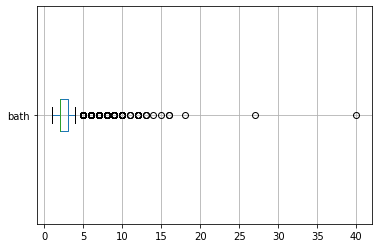

In [29]:
df.boxplot(column=['bath'],vert=False)

### The above boxplot of bath shows data distribution is positive skewed.

In [30]:
df.isnull().sum().sort_values(ascending=False)

balcony          605
bath              73
size              16
total_sqft         0
price              0
site_location      0
dtype: int64

In [31]:
# Applying median to the balcony and  bath column.
from math import floor
bath_median = float(floor(df.bath.median()))
df.bath = df.bath.fillna(bath_median)

In [32]:
df.balcony=df.balcony.mask(df.balcony==0).fillna(floor(df.balcony.median()))

In [33]:
df.balcony.value_counts()

2.0    6706
1.0    4869
3.0    1669
Name: balcony, dtype: int64

In [34]:
df.bath.value_counts()

2.0     6944
3.0     3269
4.0     1222
1.0      780
5.0      521
6.0      268
7.0      102
8.0       64
9.0       41
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
14.0       1
40.0       1
15.0       1
18.0       1
Name: bath, dtype: int64

In [35]:
# Checking the null values in the dataset again
df.isnull().sum()

size             16
total_sqft        0
bath              0
balcony           0
price             0
site_location     0
dtype: int64

In [36]:
# Dropping the rows with null values because the dataset is huge as compared to null values.
df = df.dropna()
df.isnull().sum()

size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

In [37]:
# Converting the size column to bhk
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df = df.drop('size', axis='columns')
df.groupby('bhk')['bhk'].agg('count')

bhk
1      646
2     5499
3     4834
4     1411
5      352
6      220
7      100
8       88
9       52
10      14
11       4
12       1
13       1
14       1
16       1
18       1
19       1
27       1
43       1
Name: bhk, dtype: int64

* Handlling Outlier

<AxesSubplot:>

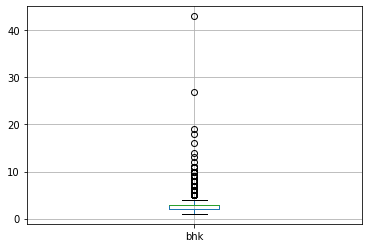

In [38]:
df.boxplot(column=['bhk'])

In [39]:
# Outliers Calculation
def min_max_iqr(df,col):
    q1, q3 = df[col].quantile([0.25,0.75])
    IQR = q3-q1
    min_valid = q1 - 1.5*IQR
    max_valid = q3 + 1.5 * IQR
    return min_valid,max_valid

In [40]:
min_valid,max_valid = min_max_iqr(df,'bhk')
print("Lower outlier Range = ",min_valid)
print("Higher outlier Range = ",max_valid)

Lower outlier Range =  0.5
Higher outlier Range =  4.5


In [41]:
# Dropping rows more than 5 BHK
df = df.drop(df[df['bhk']>=5].index)
df.groupby('bhk')['bhk'].count()

bhk
1     646
2    5499
3    4834
4    1411
Name: bhk, dtype: int64

In [42]:
df = df.drop(df[df['bath']>4].index)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


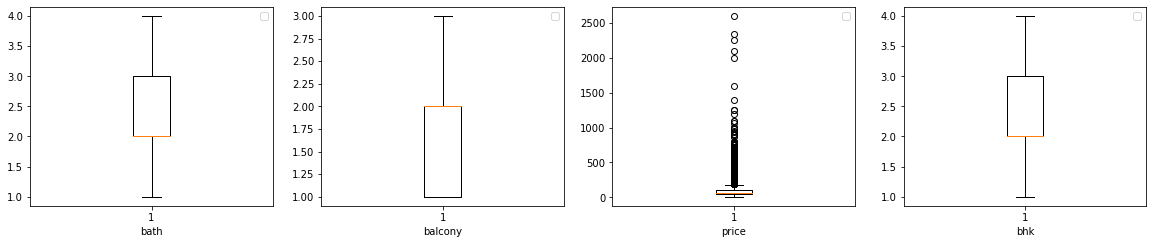

In [43]:
num_coln = df.select_dtypes(include=np.number).columns.tolist()
bins=10
j=1
fig = plt.figure(figsize = (20, 30))
for i in num_coln:
    plt.subplot(7,4,j)
    plt.boxplot(df[i])
    j=j+1
    plt.xlabel(i)
    plt.legend()
plt.show()

In [44]:
# Check the unique value in total_sqft
df.total_sqft.unique()

array(['981 - 1249', '980 - 1030', '943 - 1220', ..., '15', '11', '1'],
      dtype=object)

 * Since the total_sqft contains range values such as 1133-1384, lets filter out these values

In [45]:
def isfloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [46]:
# Displaying all the rows that are not integers

df[~df['total_sqft'].apply(isfloat)]

,total_sqft,bath,balcony,price,site_location,bhk
0,981 - 1249,2.0,2.0,34.555,Law College Road,2
1,980 - 1030,2.0,2.0,35.175,Kasba Peth,2
2,943 - 1220,2.0,2.0,38.665,Narayangaon,2
3,942 - 1117,2.0,2.0,50.855,Chandan Nagar,2
4,934 - 1437,2.0,2.0,58.680,Jangali Maharaj Road,2
...,...,...,...,...,...,...
196,1015 - 1540,2.0,2.0,56.800,Wakadewadi,2
197,1010 - 1300,2.0,2.0,50.125,Tilak Road,2
198,1005.03 - 1252.49,3.0,2.0,47.405,Dhankawadi,3
199,1004 - 1204,2.0,2.0,36.430,Wakadewadi,2


#### Now converting all values of total_sqft into a float value

In [47]:
# Converting the range values to integer values and removing other types of error
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [48]:
df['new_total_sqft'] = df.total_sqft.apply(convert_sqft_to_num)
df = df.drop('total_sqft', axis='columns')
df.head()

,bath,balcony,price,site_location,bhk,new_total_sqft
0,2.0,2.0,34.555,Law College Road,2,1115.0
1,2.0,2.0,35.175,Kasba Peth,2,1005.0
2,2.0,2.0,38.665,Narayangaon,2,1081.5
3,2.0,2.0,50.855,Chandan Nagar,2,1029.5
4,2.0,2.0,58.680,Jangali Maharaj Road,2,1185.5


In [49]:
# Removing the rows in new_total_sqft column that hase None values
df.isna().sum()

bath              0
balcony           0
price             0
site_location     0
bhk               0
new_total_sqft    0
dtype: int64

In [50]:
# Removing the rows in new_total_sqft column that hase None values
df = df.dropna()
df.isna().sum()

bath              0
balcony           0
price             0
site_location     0
bhk               0
new_total_sqft    0
dtype: int64

# Feature Enginnering for outlier detection and dimension reduction

* Feature engineering is the pre-processing step of machine learning, which is used to transform raw data into features that can be used for creating a predictive model using Machine learning or statistical Modelling.

In [51]:
# Adding a new column of price_per_sqft
df1 = df.copy()

# In our dataset the price column is in Lakhs
df1['price_per_sqft'] = (df1['price']*100000)/df1['new_total_sqft']
df1.head()

,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,2.0,2.0,34.555,Law College Road,2,1115.0,3099.103139
1,2.0,2.0,35.175,Kasba Peth,2,1005.0,3500.000000
2,2.0,2.0,38.665,Narayangaon,2,1081.5,3575.127138
3,2.0,2.0,50.855,Chandan Nagar,2,1029.5,4939.776591
4,2.0,2.0,58.680,Jangali Maharaj Road,2,1185.5,4949.810207


In [52]:
# Checking unique values of 'location' column
locations = list(df['site_location'].unique())
print(len(locations))

101


In [53]:
# Removing the extra spaces at the end
df1.site_location = df1.site_location.apply(lambda x: x.strip())
# Calulating all the unqiue values in 'site_location' column
location_stats = df1.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
location_stats

site_location
Koregaon Park      133
Chandan Nagar      132
Anandnagar         131
Vishrant Wadi      131
Bhandarkar Road    131
                  ... 
Vitthal Nagar        1
Bavdhan Khurd        1
Clover Park          1
Yashwant Nagar       1
other                1
Name: site_location, Length: 101, dtype: int64

In [54]:
# Checking locations with less than 10 values
print(len(location_stats[location_stats<=10]), len(df1.site_location.unique()))

5 101


In [55]:
df1.head()

,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,2.0,2.0,34.555,Law College Road,2,1115.0,3099.103139
1,2.0,2.0,35.175,Kasba Peth,2,1005.0,3500.000000
2,2.0,2.0,38.665,Narayangaon,2,1081.5,3575.127138
3,2.0,2.0,50.855,Chandan Nagar,2,1029.5,4939.776591
4,2.0,2.0,58.680,Jangali Maharaj Road,2,1185.5,4949.810207


In [56]:
# Labelling the locations with less than or equal to 10 occurences to 'other'
locations_less_than_10 = location_stats[location_stats<=10]
df1.site_location = df1.site_location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(df1.site_location.unique())

97

In [59]:
df1.head()

,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
0,2.0,2.0,34.555,Law College Road,2,1115.0,3099.103139
1,2.0,2.0,35.175,Kasba Peth,2,1005.0,3500.000000
2,2.0,2.0,38.665,Narayangaon,2,1081.5,3575.127138
3,2.0,2.0,50.855,Chandan Nagar,2,1029.5,4939.776591
4,2.0,2.0,58.680,Jangali Maharaj Road,2,1185.5,4949.810207


# Removing Outliers

<AxesSubplot:>

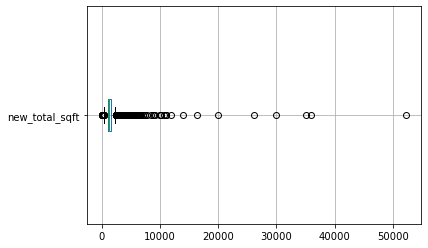

In [60]:
df1.boxplot(column=['new_total_sqft'],vert=False)

In [62]:
# Removing the rows that have 1 Room for less than 300sqft
df2 = df1[~(df1.new_total_sqft/df1.bhk<300)]
print("Total rows whose Total Area per bhk is below 300 sqft = ",len(df2))
print("Total rows whose Total Area per bhk is above 300 sqft = ",len(df1))
# print(len(df2), len(df1))

Total rows whose Total Area per bhk is below 300 sqft =  11727
Total rows whose Total Area per bhk is above 300 sqft =  12001


<AxesSubplot:>

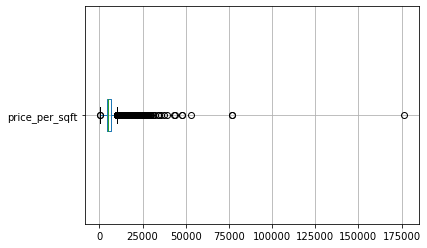

In [63]:
df2.boxplot('price_per_sqft',vert=False)

In [64]:
df2.price_per_sqft.describe()

count     11727.000000
mean       6041.496098
std        3711.441236
min         267.829813
25%        4186.499400
50%        5214.799589
75%        6691.841021
max      176470.588235
Name: price_per_sqft, dtype: float64

In [65]:
# Since there is a wide range for 'price_per_sqft' column with min = Rs.267/sqft till max = Rs. 127470/sqft, we remove the extreme ends using the mean and SD
def remove_pps_outliers(df):
    
    df_out = pd.DataFrame()
    
    for key, sub_df in df.groupby('site_location'):
        m = np.mean(sub_df.price_per_sqft)
        sd = np.std(sub_df.price_per_sqft)
        reduce_df = sub_df[(sub_df.price_per_sqft>(m-sd)) & (sub_df.price_per_sqft<(m+sd))]
        df_out = pd.concat([df_out, reduce_df], ignore_index=True)
    
    return df_out

df3 = remove_pps_outliers(df2)
print("Length of data before removing outlier = ",len(df2))
print("Length of data before after outlier = ",len(df3))

Length of data before removing outlier =  11727
Length of data before after outlier =  10075


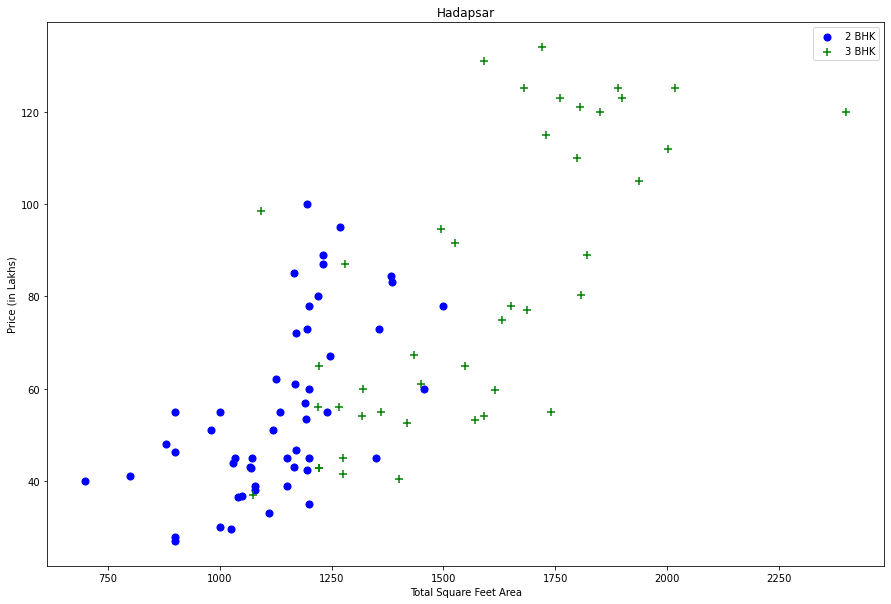

In [66]:
def plot_scatter_chart(df, site_location):
    bhk2 = df[(df.site_location == site_location) & (df.bhk == 2)]
    bhk3 = df[(df.site_location == site_location) & (df.bhk == 3)]
    rcP['figure.figsize'] = (15,10)
    plt.scatter(bhk2.new_total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.new_total_sqft, bhk3.price, color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price (in Lakhs)')
    plt.title(site_location)
    plt.legend()
    
plot_scatter_chart(df3, 'Hadapsar')

In [67]:
# Here we observe that 3 BHK cost that same as 2 BHK in 'Hadapsar' location hence removing such outliers is necessary
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    for site_location, site_location_df in df.groupby('site_location'):
        bhk_stats = {}
        
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        for bhk, bhk_df in site_location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    
    return df.drop(exclude_indices, axis='index')

df4 = remove_bhk_outliers(df3)
print(len(df3), len(df4))

10075 6884


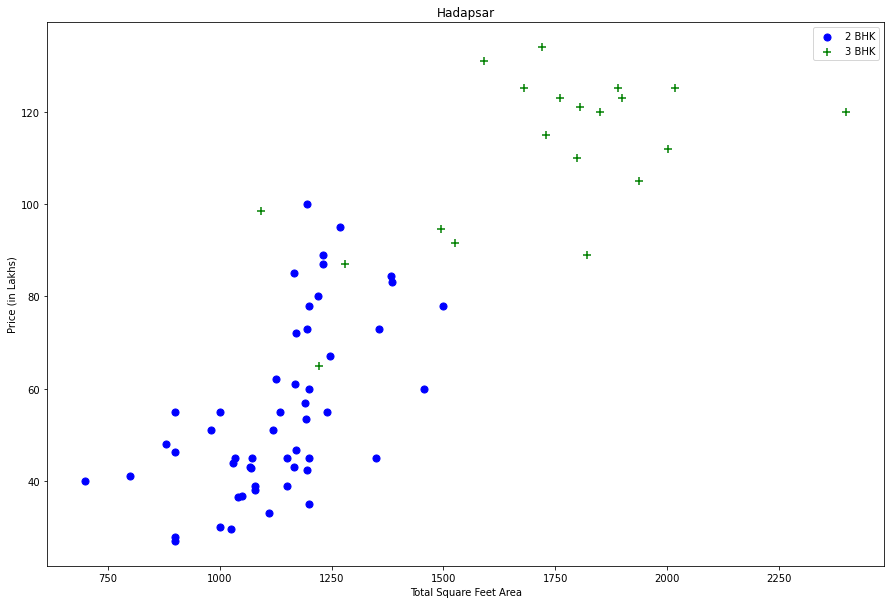

In [68]:
plot_scatter_chart(df4, 'Hadapsar')

Text(0, 0.5, 'Count')

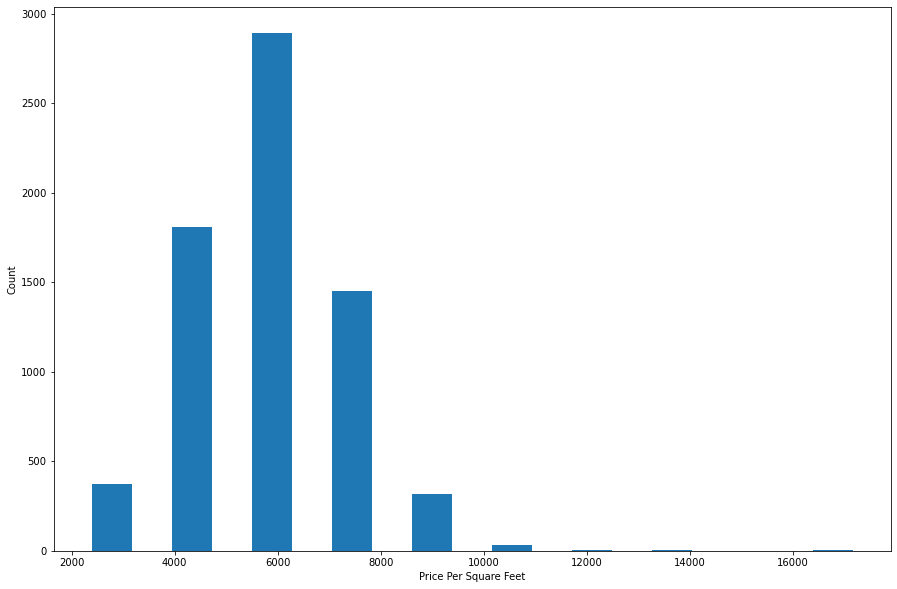

In [69]:
plt.hist(df4.price_per_sqft, rwidth=0.5)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

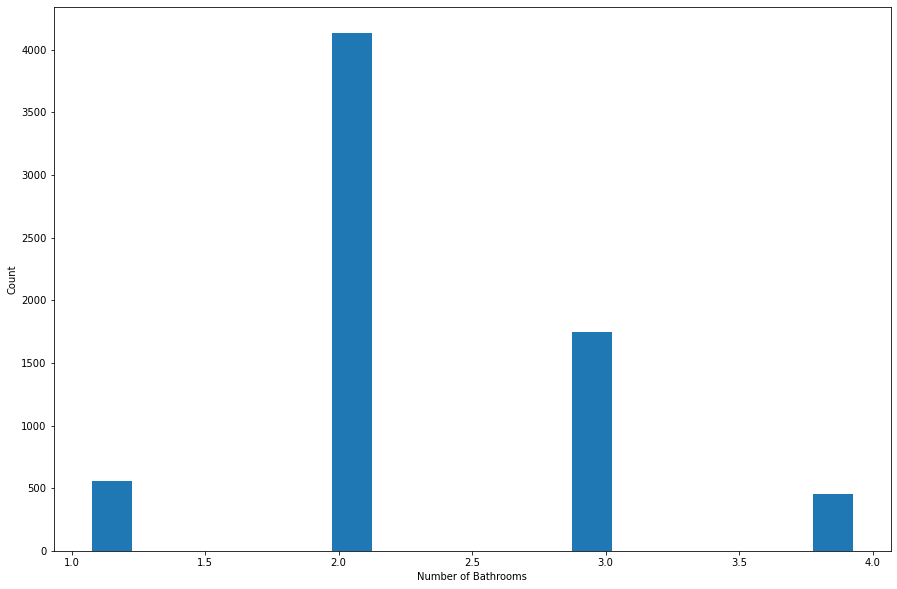

In [70]:
plt.hist(df4.bath, rwidth=0.5)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [71]:
# Removing the rows that have 'bath' greater than 'bhk'+1
df5 = df4[df4.bath<(df4.bhk+1)]
print(len(df4), len(df5))

6884 6636


In [72]:
df5.shape

(6636, 7)

In [73]:
df5.tail()

,bath,balcony,price,site_location,bhk,new_total_sqft,price_per_sqft
10070,1.0,2.0,21.0,Yerawada,1,550.0,3818.181818
10071,1.0,1.0,39.0,Yerawada,1,516.0,7558.139535
10072,1.0,1.0,15.0,Yerawada,1,456.0,3289.473684
10073,3.0,2.0,190.0,other,3,1810.0,10497.237569
10074,4.0,2.0,240.0,other,4,2000.0,12000.000000


In [74]:
pd.crosstab([df5["site_location"], df["bhk"]], df["bath"]).style.background_gradient(cmap='summer_r')

# Model Building

In [75]:
# Removing the unnecessary columns (columns that were added only for removing the outliers)
df6 = df5.copy()
df6 = df6.drop('price_per_sqft', axis='columns')

In [76]:
df6.head()

,bath,balcony,price,site_location,bhk,new_total_sqft
0,4.0,3.0,550.0,Alandi Road,4,7000.0
1,4.0,2.0,262.0,Alandi Road,4,3504.0
2,4.0,2.0,230.0,Alandi Road,4,3250.0
4,4.0,1.0,245.0,Alandi Road,4,2894.0
5,2.0,1.0,160.0,Alandi Road,2,2480.0


<AxesSubplot:>

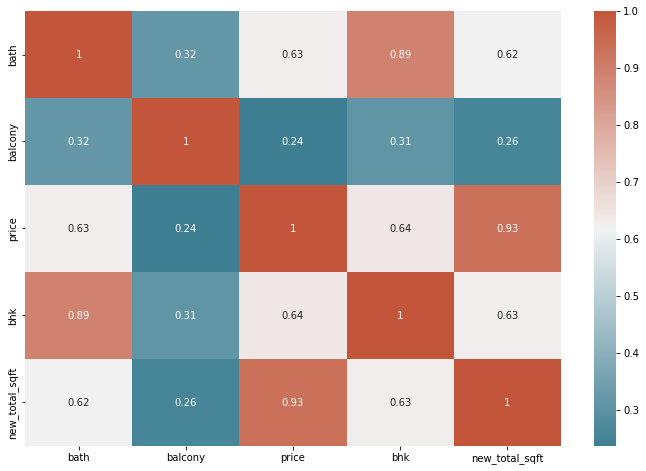

In [77]:
fig, ax = plt.subplots(figsize=(12,8))
corr = df6.corr(method='pearson')# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Use One Hot Encoding For site_location

In [78]:
# Converting the categorical_value into numerical_values using get_dummies method
dummy_cols = pd.get_dummies(df6.site_location)
df6 = pd.concat([df6,dummy_cols], axis='columns')

In [79]:
df6.drop(['site_location'], axis='columns', inplace=True)
df6.head(10)

,bath,balcony,price,bhk,new_total_sqft,Alandi Road,Ambegaon Budruk,Anandnagar,Aundh,Aundh Road,...,Vadgaon Budruk,Viman Nagar,Vishrant Wadi,Wadgaon Sheri,Wagholi,Wakadewadi,Wanowrie,Warje,Yerawada,other
0,4.0,3.0,550.0,4,7000.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2.0,262.0,4,3504.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,2.0,230.0,4,3250.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,1.0,245.0,4,2894.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.0,1.0,160.0,2,2480.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3.0,2.0,135.0,3,1856.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,3.0,2.0,145.0,3,1855.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,3.0,2.0,90.0,3,1850.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,3.0,2.0,115.0,3,1801.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,3.0,2.0,128.0,3,1756.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
# Size of the dataset
df6.shape

(6636, 102)

In [81]:
df6.to_csv('cleaned_data.csv')

In [82]:
# Splitting the dataset into features and label
X = df6.drop('price', axis='columns')
y = df6['price']

In [83]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [86]:
# Creating a function for GridSearchCV

def find_best_model(X, y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'fit_intercept': [True,False],
                'copy_X': [True,False],
                'positive': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'fit_intercept': [True,False],
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['squared_error', 'friedman_mse','absolute_error', 'poisson'],
                'splitter': ['best', 'random'],
                'max_features': ['sqrt', 'log2']
            }
        },
        'GradientBoostRegressor':
        {
            'model': GradientBoostingRegressor(),
            'parameters' :
            {
                'n_estimators' : [ 50, 100, 150, 200],
                'subsample' : [0.6, 0.7, 0.8],
                'max_depth' :[ 5,6,7,8]
            }
        },
        
        'Ridge':
        {
            'model':Ridge(),
            'parameters':
            {
                'alpha': [50,30,10,5,1,0.1,0.01] ,
                "fit_intercept": [True, False],
                "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
            }
        },
        
        'XGBRegressor':
        {
            'model':XGBRegressor(),
            'parameters':
            {
              'objective': ['reg:linear'],
              'nthread':[4], 
              'objective':['reg:squarederror'],
              'learning_rate': [.03, 0.05, .07], 
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]
            }
        },
          'RandomForestRegressor':
         {
              'model': RandomForestRegressor(oob_score=True),
              'parameters':
              {
                  'n_estimators' : [ 50, 100, 150],
                  'criterion' : ['squared_error', 'absolute_error', 'poisson'],
                  'max_depth' :[ 2, 3, None],
                  'max_features' : ['sqrt', 'log2'],
                  'max_samples' : [0.1, 0.3,0.6, 0.9]
              }
          }
    }
    
    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters',    'accuracy'])

find_best_model(X_train, y_train)

C:\Users\Public\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Public\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Public\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\Public\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a fu

,model,best_parameters,accuracy
0,linear_regression,"{'copy_X': True, 'fit_intercept': False, 'posi...",0.866279
1,lasso,"{'alpha': 1, 'fit_intercept': True, 'selection...",0.858002
2,decision_tree,"{'criterion': 'squared_error', 'max_features':...",0.649416
3,GradientBoostRegressor,"{'max_depth': 6, 'n_estimators': 100, 'subsamp...",0.802762
4,Ridge,"{'alpha': 10, 'fit_intercept': True, 'solver':...",0.866358
5,XGBRegressor,"{'colsample_bytree': 0.7, 'learning_rate': 0.0...",0.788231
6,RandomForestRegressor,"{'criterion': 'absolute_error', 'max_depth': N...",0.727848


In [94]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge()
from sklearn.model_selection import GridSearchCV
params_Ridge = {'alpha': [50,30,10,5,1,0.1,0.01] , "fit_intercept": [True, False], "solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge)
Ridge_GS.fit(X_train,y_train)
Ridge_GS.best_params_

{'alpha': 10, 'fit_intercept': True, 'solver': 'auto'}

* Since the accuracy of Ridge Regression is Higher. Ridge Regression is Selected for training model

In [95]:
model = Ridge(alpha = 10, fit_intercept = True, solver ='auto', random_state = 7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [96]:
model.score(X_test, y_test)

0.8484012767634831

* Based on above results we can say that Ridge Regression gives the best score. Hence we will use that.

### Predicting the Values using our trained model

In [98]:
X.columns

Index(['bath', 'balcony', 'bhk', 'new_total_sqft', 'Alandi Road',
       'Ambegaon Budruk', 'Anandnagar', 'Aundh', 'Aundh Road', 'Balaji Nagar',
       'Baner', 'Baner road', 'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi',
       'Bopodi', 'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi', 'Dhayari Phata',
       'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind', 'Ghorpade Peth',
       'Ghorpadi', 'Gokhale Nagar', 'Gultekdi', 'Guruwar peth', 'Hadapsar',
       'Hadapsar Industrial Estate', 'Hingne Khurd', 'Jangali Maharaj Road',
       'Kalyani Nagar', 'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj',
       'Khadaki', 'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk',
       'Kondhwa Khurd', 'Koregaon Park', 'Kothrud', 'Law College Road',
       'Laxmi Road', 'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 

In [99]:
# For finding the appropriate location
np.where(X.columns=='Balaji Nagar')[0][0]

9

In [100]:
# Creating a fuction to predict values

def prediction(location, bhk, bath, balcony, sqft):
    
    loc_index, area_index, avail_index = -1,-1,-1
        
    if location!='other':
        loc_index = int(np.where(X.columns==location)[0][0])
            
    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = balcony
    x[2] = bhk
    x[3] = sqft
    
    if loc_index >= 0:
        x[loc_index] = 1 
    if x[3] in range(300,10000):
        x[3] = sqft
    else:
        return False
    return model.predict([x])[0]

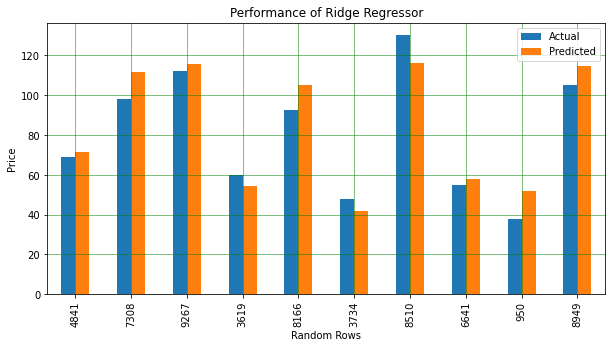

In [157]:
df_check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_check = df_check.sample(10)
#round(df_check,2)
df_check.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.title('Performance of Ridge Regressor')
plt.xlabel('Random Rows')
plt.ylabel('Price')
plt.savefig('Ridge-Regression-Performance.jpg')
plt.show()

In [158]:
# locax = input("Enter the location : ")
# size = int(input("Enter BHK :"))
# bathing = int(input("Enter Bathroom : "))
# bal = int(input("Enter balcony : "))
# feet = int(input("Enter sqft : "))
# output = prediction(locax, size, bathing, bal, feet)
# print(round(output,2),"Lakhs")


In [159]:
# Prediction 1
# Input in the form : Location, BHK, Bath, Balcony, Sqft.
output = prediction('Alandi Road', 2, 2, 2,12000)
if output == False:
    print("Enter sqft in range (300-5000)")
else:
    print(output)

Enter sqft in range (300-5000)


In [160]:
# Prediction 1
# Input in the form : Location, BHK, Bath, Balcony, Sqft.
prediction('Balaji Nagar', 2, 2, 2, 1440)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


80.34872344904379

In [161]:
# Prediction 2
# Input in the form : Location, BHK, Bath, Balcony, Sqft.
prediction('Hadapsar', 3, 3, 2, 1850)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


115.10564473995852

In [163]:
# Prediction 3
# Input in the form : Location, BHK, Bath, Balcony, Sqft.
prediction('Chandan Nagar', 3, 2, 2, 1500)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


96.2517780137173

In [164]:
# Prediction 4
# Input in the form : Location, BHK, Bath, Balcony, Sqft.
prediction('Baner', 3, 3, 2,1800 )

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


113.24453167693618

In [165]:
# Prediction 4
# Input in the form : Location, BHK, Bath, Balcony, Sqft.
prediction('Tilak Road', 4, 3, 2, 2100)

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


142.81492262761003

In [97]:
import pickle
pickle.dump(model, open('model2.pkl','wb'))
model2 = pickle.load(open('model2.pkl','rb'))